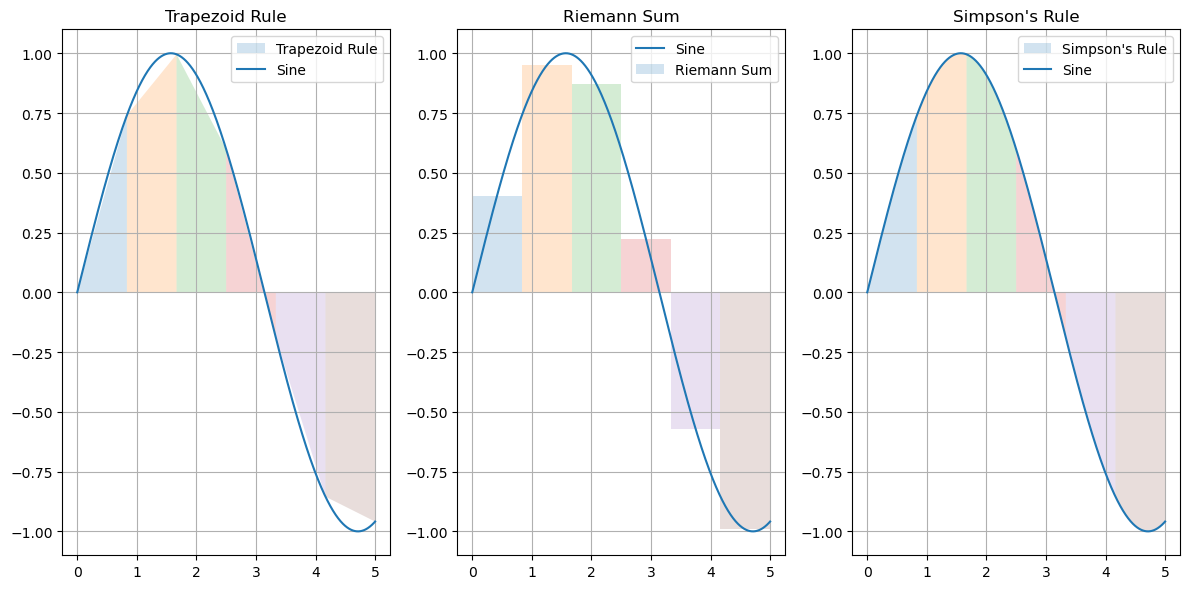

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sine(x):
    return np.sin(x)

a, b = 0, 5
num_intervals = 6

x = np.linspace(a, b, 1000)
y = np.sin(x)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Trapezoid rule
h = (b - a) / num_intervals
x_trapezoid = np.linspace(a, b, num_intervals + 1)
y_trapezoid = sine(x_trapezoid)
for i in range(num_intervals):
    axs[0].fill_between(x_trapezoid[i:i+2], 0, y_trapezoid[i:i+2], alpha=0.2, label='Trapezoid Rule' if i == 0 else None)
axs[0].plot(x, y, label='Sine')
axs[0].legend()
axs[0].set_title("Trapezoid Rule")

# Riemann sum
x_riemann = np.linspace(a, b, num_intervals + 1)
y_riemann = sine(x_riemann[:-1] + h / 2)
for i in range(num_intervals):
    axs[1].bar(x_riemann[i:i+1], y_riemann[i:i+1], width=h, alpha=0.2, align='edge', label='Riemann Sum' if i == 0 else None)
axs[1].plot(x, y, label='Sine')
axs[1].legend()
axs[1].set_title("Riemann Sum")

# Simpson's rule
num_simpson_intervals = 2 * num_intervals  # Ensure an even number of intervals
h_simpson = (b - a) / num_simpson_intervals
x_simpson = np.linspace(a, b, num_simpson_intervals + 1)
y_simpson = sine(x_simpson)

# Plot quadratic approximations for Simpson's rule
for i in range(0, num_simpson_intervals, 2):
    quad_x = x_simpson[i:i+3]
    quad_y = y_simpson[i:i+3]
    coeffs = np.polyfit(quad_x, quad_y, 2)
    quad_approx = np.poly1d(coeffs)
    quad_plot_x = np.linspace(quad_x[0], quad_x[-1], 100)
    axs[2].fill_between(quad_plot_x, 0, quad_approx(quad_plot_x), alpha=0.2, label="Simpson's Rule" if i == 0 else None)

axs[2].plot(x, y, label='Sine')
axs[2].legend()
axs[2].set_title("Simpson's Rule")

for a in axs: a.grid()

plt.tight_layout()
plt.show()
fig.savefig('rules.pdf', dpi=300)
